## Lab 2: Text Classification

Note: For this lab exercise, it is recommended that you use [Google colab](https://colab.research.google.com/) to avoid issues concerning the deep learning module dependencies on your local system.

For questions contact:

Yash Pawar

email ID: yash.pawar@dsv.su.se

## 1. Introduction


In this lab exercise, we will perform classification of text into predefined classes using Machine Learning. In particular, we will be classifying the text from [BBC](http://mlg.ucd.ie/datasets/bbc.html) dataset consisting of 5 different classes. 

In [1]:
import pandas as pd
import os
import numpy as np

## Suppress warnings

import warnings
warnings.filterwarnings("ignore")

### 2. Import Dataset


In [2]:
# Note: The filepath has been specified considerning that the notebook is run using google colab.

bbc = pd.read_csv(filepath_or_buffer='bbc_text.csv', delimiter = ',')
bbc.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
from sklearn.model_selection import train_test_split

## To do: Replace the ??? with code to split the dataset into train and test set
training_bbc, test_bbc = train_test_split(bbc)
print("training_bbc:\n", training_bbc.head())
print("test_bbc:\n", test_bbc.head())

training_bbc:
       category                                               text
2051  business  hariri killing hits beirut shares shares in so...
1161     sport  israeli club look to africa four african playe...
1162     sport  moyes u-turn on beattie dismissal everton mana...
1474  business  lufthansa may sue over bush visit german airli...
400      sport  double injury blow strikes wales wales centre ...
test_bbc:
            category                                               text
211        politics  straw attacked on china arms moves to lift the...
1452           tech  spam e-mails tempt net shoppers computer users...
2068           tech  online games play with politics after bubbling...
655   entertainment  eminem secret gig venue revealed rapper eminem...
992            tech  concern over rfid tags consumers are very conc...


### 3. Visualization

Your task here is to get an understanding of distribution of different classes in the data by visualization and compare them.

You are expected to generate two plots, on for each training and test dataset.

You can refer to the [Bar plots tutorial](https://pythonguides.com/matplotlib-plot-bar-chart/) to know more.

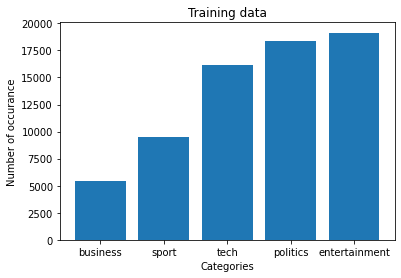

In [21]:
import matplotlib.pyplot as plt

# To do: add the code below to plot the Distribution of classes in both the datasets.
# Training data:
#cnt_training = training_bbc["text"].str.findall(r"(\w+)").explode().value_counts()
sentence_len = training_bbc['text'].str.len()
plt.bar(training_bbc['category'],sentence_len)
plt.title("Training data")
plt.ylabel("Number of occurance")
plt.xlabel("Categories")
plt.show()

### 5. Classification using Naive Bayes

For training and validation, we will use a [Multinomial Naive Bayes classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html). Here, you are expected to:

1. Vectorize the text from the training set.
2. Train the classifier
3. Evaluate the classifier using the test set. 

Tip: You can use [sklearn's pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) functionality to perform steps 1 and 2. 

Tip: You can use [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to print the results of evaluation.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train and evaluate a Multinomial Naive Bayes classifier
# To do: Add the code below to build a pipeline for the classifier.


### 6. Baseline Classifier

You can compare the performance of your Machine Learning model with a simple baseline classifier. One possibility could be to use a classifier that generates predictions by respecting the training set’s class distribution. You can consider using [Dummy classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) from scikit learn.



In [ ]:
from sklearn.dummy import DummyClassifier

# Evaluate the random baseline
baseline = DummyClassifier(strategy="stratified")

# To do: Add the code below to train the baseline classifier and evaluate it.


Is the result from the baseline classifier justified?

### 6. Grid Search

So far, you have trained the vectorizer and the classifer using their default parameters. However, in practical settings, one needs to optimize the parameters of the model to maximize the performance. 

Here, you are asked to find the optimal parameters for the pipelines that you have created above using a 5 fold cross validation. The choice of hyperparameters for optimization are:

1. Bi-grams vs uni-grams vs tri-grams from [Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). 
2. Additive smoothing  for the Multinomial naive bayes classifier $\alpha$ = {1, 0.1}
3. Tokenized vs non-tokenized text (For tokenization, you can use the function 'preprocess' that is given below as a parameter for the vectorizer.)


You can refer to the [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) documentation from the scikit-learn library.

Finally, print the parameters from the grid search that give the best performance. 

In [ ]:

# Function preprocess can be used as a tokenizer.

import spacy
nlp = spacy.load('en_core_web_sm', disable=["tagger", "parser", "ner"])

def preprocess(text):
    doc = nlp(text)
 
    final_key=[]
    for token in doc:
        if token.is_stop==False and token.lemma_.isalpha():
            
            final_key.append(token.lemma_)
        
    return final_key

In [ ]:
from sklearn.model_selection import GridSearchCV

# To do: Replace the ??? in the code and implement the grid search
# Note: Take a look at how you an specify the parameters for grid search from an example of n-grams. Similarly, you can specify the other remaining parameters.
params = {'vectorizer__ngram_range':[(1,1), (1,2), (1,3)],
          ???,
          ???}




## 7. Fine-tuning using BERT

In this section, you will see how a pre-trained BERT model can be fine tuned for the task of text classification. 

Run the following cells to fine-tune the model. 

In [ ]:
'Download the tokenizer and BERT module for python'

#!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py



!pip install bert-for-tf2
!pip install sentencepiece

In [ ]:
'Import all the necessary modules'

#import tokenization
import tensorflow as tf
import tensorflow_hub as hub
import bert
from tensorflow.keras.models import  Model
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

print("TensorFlow Version:",tf.__version__)
print("Hub version: ",hub.__version__)

In [ ]:
'Download the pretrained BERT model'

m_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(m_url, trainable=True)

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
#tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

'Use BERT tokenizer'
FullTokenizer = bert.bert_tokenization.FullTokenizer
tokenizer=FullTokenizer(vocab_file,do_lower_case)


def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
        
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len-len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
        
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")
    
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    
    clf_output = sequence_output[:, 0, :]
    
    lay = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    lay = tf.keras.layers.Dense(32, activation='relu')(lay)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    out = tf.keras.layers.Dense(5, activation='softmax')(lay)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
'Set the maximum length of the sequence'
max_len = 512

'Transform non-numerical labels to numerical'
label = preprocessing.LabelEncoder()
train_labels = label.fit_transform(training_bbc['category'])
train_labels = to_categorical(train_labels)

'Prepare the input by tokenising and padding the text sequence'
train_input = bert_encode(training_bbc.text.values, tokenizer, max_len=max_len)
test_input = bert_encode(test_bbc.text.values, tokenizer, max_len=max_len)



In [ ]:
labels = label.classes_
print(labels)

In [ ]:
'Build the model'

model = build_model(bert_layer, max_len=max_len)
model.summary()

In [ ]:
'Start training the model'

checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

train_sh = model.fit(
    train_input, train_labels,
    validation_split=0.1,
    epochs=1,
    callbacks=[checkpoint, earlystopping],
    batch_size=4,
    verbose=1
)

In [ ]:
'Predict the classes from the fine-tuned BERT model'
bert_pred = model.predict(test_input)

In [ ]:
'Invert the classes from numerical to non-numerical (original) categories'
y_pred_bert = label.inverse_transform(np.argmax(bert_pred.round().astype(int), axis=1))

In [ ]:

print(classification_report(test_bbc['category'], y_pred_bert, digits=4))

1. Comment on the results. Is there any improvement in performance when compared to MultinomialNB?

2. Try changing the number of epochs to 3 and then 5 to see if there is any improvement in the performance. 